#### importing necessary libraries

In [6]:
import numpy as np
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from tabulate import tabulate

#### Load the data using pickle.load() function

In [7]:

tr_dataset = np.load('train_dataset.pickle', allow_pickle=True) #data is now tr_dataset 
test_dataset = np.load('test_dataset.pickle', allow_pickle=True) #test_data is test_dataset

#### Splitting the dataset into 20 randomly assigned equal datasets(no overlap) - using train_test_split into increasingly smaller splits and printing equally splitted train sets

In [8]:
train_datasets = []
#test_data = []

for i in range(20):
    x_train, _, y_train, _ = train_test_split(tr_dataset[:, :-1], tr_dataset[:, -1], test_size=0.95)
    train_set = np.concatenate((x_train, y_train.reshape(-1, 1)), axis=1)
    train_datasets.append(train_set)
    print(f'Train Set {i+1}:')
    print(train_set)

Train Set 1:
[[0.3331273  1.47695936]
 [0.75909819 2.94480594]
 [0.86751894 3.6893117 ]
 [0.23195077 1.29667938]
 [0.47642924 1.80912744]
 [0.07490091 1.0809045 ]
 [0.59158824 2.17104306]
 [0.32358544 1.45830651]
 [0.27648507 1.37145239]
 [0.76575788 2.9839324 ]
 [0.3825116  1.57976354]
 [0.85481772 3.58906193]
 [0.179645   1.21704758]
 [0.55126516 2.032153  ]
 [0.67491784 2.51045502]
 [0.7555006  2.92398693]
 [0.26278297 1.34772193]
 [0.08929748 1.09793135]
 [0.2954998  1.40550447]
 [0.06908237 1.0741648 ]
 [0.8570344  3.60628245]
 [0.0378092  1.17107145]
 [0.46303032 1.77330105]
 [0.51392881 1.91573532]
 [0.96463409 4.5973845 ]
 [0.03626318 1.03762428]
 [0.00999701 1.01009793]
 [0.56181761 2.06710572]
 [0.56485856 2.077356  ]
 [0.44132578 1.71759897]
 [0.68197344 2.54296285]
 [0.82473894 3.36640621]
 [0.59249873 2.17435194]
 [0.61738448 2.26798115]
 [0.29030799 1.39607467]
 [0.75574867 2.92541543]
 [0.2571612  1.33817557]
 [0.45092521 1.58376536]
 [0.76757562 2.99474614]
 [0.24651833

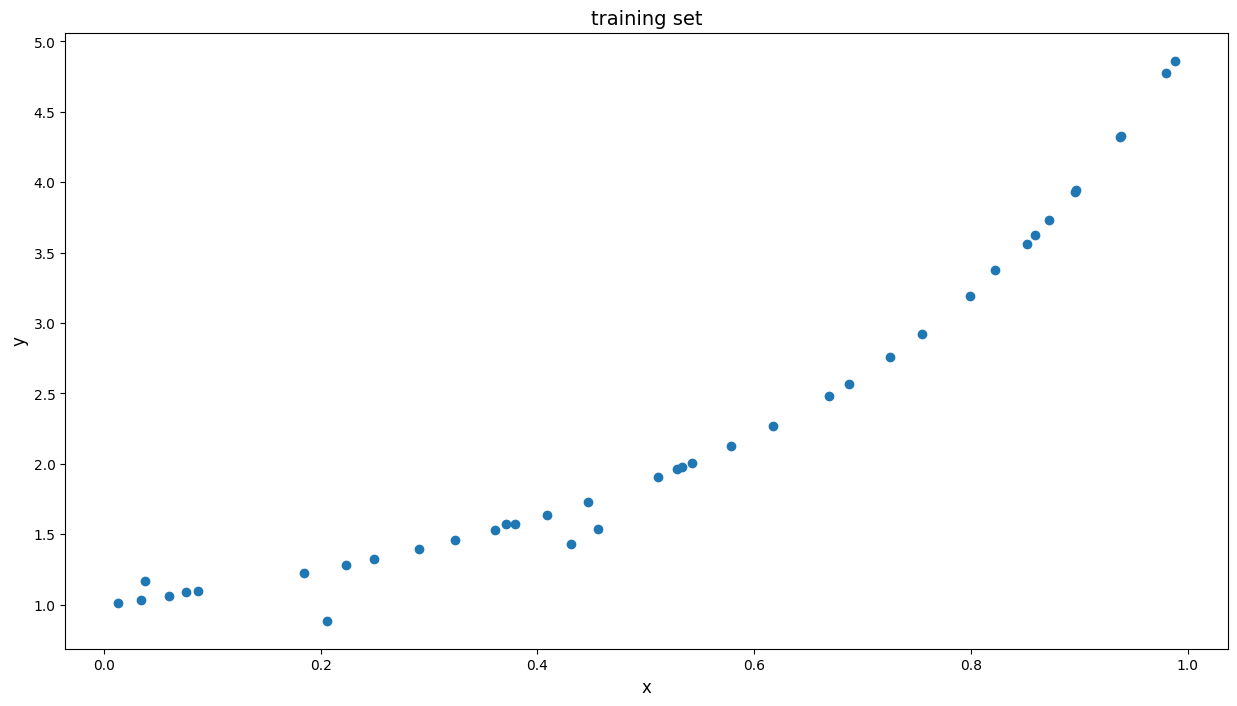

In [9]:
plt.figure(figsize=(15,8))
plt.scatter(x_train, y_train)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('training set', fontsize=14)
plt.show()

#### Print the test dataset

In [10]:
print("Test dataset:")
print(test_dataset)

Test dataset:
[[0.93816262 4.17610043]
 [0.12683663 1.14477149]
 [0.69200514 2.59031782]
 [0.62910567 2.5595689 ]
 [0.96231186 4.57241736]
 [0.8475707  3.56683218]
 [0.49887715 1.87177622]
 [0.06536856 1.06990506]
 [0.8514891  3.5634183 ]
 [0.58189877 2.40535991]
 [0.67200711 2.49723187]
 [0.20092187 1.24842779]
 [0.3487721  1.50836404]
 [0.86448841 3.66504178]
 [0.25257637 1.23924468]
 [0.40314262 1.3762234 ]
 [0.47190848 1.79691264]
 [0.9921782  4.90723158]
 [0.3689889  1.55052333]
 [0.57232924 2.10288389]
 [0.96491309 4.60039596]
 [0.10886401 1.1218957 ]
 [0.81956034 3.33006223]
 [0.95959133 4.54338957]
 [0.2932823  1.40146455]
 [0.78264689 3.08668109]
 [0.04868554 1.05116615]
 [0.27287428 1.36513444]
 [0.72665708 2.76477604]
 [0.53827254 1.99039331]
 [0.19095483 1.23355969]
 [0.59062092 2.16753643]
 [0.27051011 1.36102291]
 [0.5838376  2.14319669]
 [0.03825312 1.03977042]
 [0.32186111 1.45497524]
 [0.3237083  1.45854433]
 [0.46882619 1.78865915]
 [0.56918508 2.09207956]
 [0.4963082

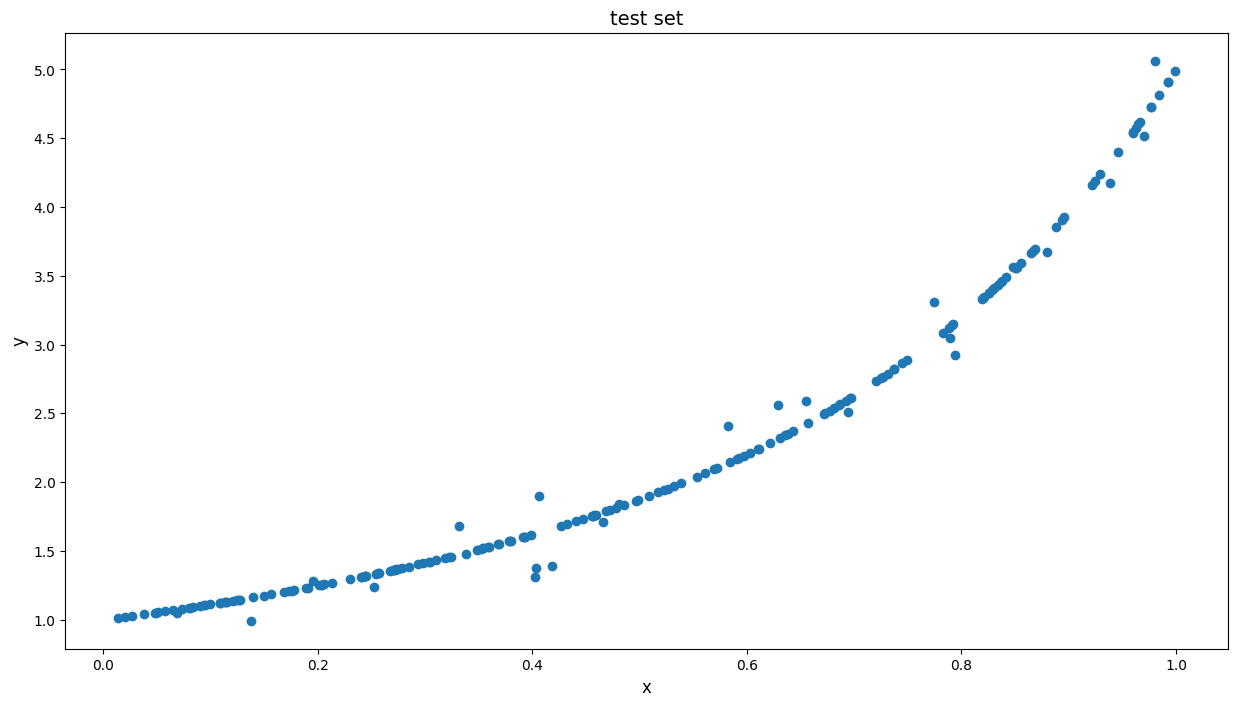

In [11]:
#plotting test_dataset
x_test = test_dataset[:, 0]
y_test = test_dataset[:, 1]
plt.figure(figsize=(15,8))
plt.scatter(x_test, y_test)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('test set', fontsize=14)
plt.show()

In [12]:
len(test_dataset)

200

# TASK 3.2
#### Train a linear classifier on each of the 20 train sets separately so that you have 20 different classifiers or models and calculate Bias, Variance

In [13]:
#TASK 3.2
# Load the data
tr_datasets = np.load('train_dataset.pickle', allow_pickle=True)
test_dataset = np.load('test_dataset.pickle', allow_pickle=True)

# Combine train and test data to create one dataset
data = np.vstack((tr_datasets, test_dataset))

# Define the degrees of the polynomials
degrees = range(1, 16)

# Divide the train data into 20 equal parts randomly
n_splits = 20
train_sets = []
for i in range(n_splits):
    x_train, _, y_train, _ = train_test_split(tr_datasets[:, :-1], tr_datasets[:, -1], test_size=0.95)
    train_set = np.hstack((x_train, y_train.reshape(-1, 1)))
    train_sets.append(train_set)

#Create 20 datasets (train and test) for each train set and each degree of polynomial
datasets = []
for i in range(n_splits):
    for deg in degrees:
        poly = PolynomialFeatures(degree=deg)
        x_train_poly = poly.fit_transform(train_sets[i][:, :-1])
        x_test_poly = poly.fit_transform(test_dataset[:, :-1])
        dataset = {'train': (x_train_poly, train_sets[i][:, -1]), 'test': (x_test_poly, test_dataset[:, -1])}
        datasets.append(dataset)

# Train a linear classifier on each of the 20 train sets for each degree of polynomial
models = []
for dataset in datasets:
    model = LinearRegression()
    model.fit(dataset['train'][0], dataset['train'][1])
    models.append(model)

# Calculate the bias and variance for each model
results = []
for deg in degrees:
    deg_results = []
    for i in range(n_splits):
        start_idx = (deg - 1) * n_splits + i
        tr_datasets = datasets[start_idx]['train'][0]
        train_labels = datasets[start_idx]['train'][1]
        test_dataset = datasets[start_idx]['test'][0]
        test_labels = datasets[start_idx]['test'][1]

        model = models[start_idx]
        train_predictions = model.predict(tr_datasets)
        test_predictions = model.predict(test_dataset)

        # Calculate bias
        bias = np.mean((test_labels - np.mean(train_predictions))**2)
        bias_sq = bias**2

        # Calculate variance
        variance = np.mean(np.var(test_predictions, axis=0))
        
        # Calculate mean squared error
        mse = mean_squared_error(test_labels, test_predictions)

        deg_results.append((bias, variance, mse))

    results.append(deg_results)

for deg in degrees:
    print(f'Degree {deg}')
    for i in range(n_splits):
        print(f'Train Set {i+1}: Bias={results[deg-1][i][0]}, Variance={results[deg-1][i][1]}, MSE={results[deg-1][i][2]}')


Degree 1
Train Set 1: Bias=1.2119761812136742, Variance=0.9444922061348285, MSE=0.11890929923857253
Train Set 2: Bias=1.2119761812136742, Variance=1.1271329573670783, MSE=0.012898586743527573
Train Set 3: Bias=1.2119761812136742, Variance=1.1552400664034819, MSE=0.005112834514400402
Train Set 4: Bias=1.2119761812136742, Variance=1.17493453467264, MSE=0.00441044510598629
Train Set 5: Bias=1.2119761812136742, Variance=1.1775105040475844, MSE=0.0043776141244873425
Train Set 6: Bias=1.2119761812136742, Variance=1.1737954284431347, MSE=0.00442707379453798
Train Set 7: Bias=1.211976181213675, Variance=1.1937053600093213, MSE=0.004596987685743372
Train Set 8: Bias=1.2119761812137027, Variance=1.1366082479912998, MSE=0.005943215620559728
Train Set 9: Bias=1.2119761812139598, Variance=1.2464928709410485, MSE=0.007186868866401659
Train Set 10: Bias=1.2119761812148993, Variance=1.098880989056946, MSE=0.012438095646524991
Train Set 11: Bias=1.2119761812262488, Variance=1.345174495493468, MSE=0.022

In [14]:
import pandas as pd
# Create a pandas dataframe to store the average bias and variance for each degree
average_results = pd.DataFrame(columns=['Degree', 'Average Bias', 'Average Variance', 'Average MSE'])

# Calculate the average bias and variance for each degree
for deg in degrees:
    bias_list = [results[deg-1][i][0] for i in range(n_splits)]
    variance_list = [results[deg-1][i][1] for i in range(n_splits)]
    mse_list= [results[deg-1][i][2] for i in range(n_splits)]
    avg_bias = np.mean(bias_list)
    avg_variance = np.mean(variance_list)
    avg_MSE = np.mean(mse_list)
    average_results.loc[len(average_results)] = [deg, avg_bias, avg_variance, avg_MSE]

# Print the average bias and variance for each degree in a separate table
print('Average Bias, Variance, and MSE for each Degree:')
print(average_results.to_string(index=False))

Average Bias, Variance, and MSE for each Degree:
 Degree  Average Bias  Average Variance  Average MSE
    1.0      1.214157          1.217276     0.047500
    2.0      1.266473          1.199850     0.024620
    3.0      1.283216          1.166501     0.012234
    4.0      1.287713          2.536295     1.321901
    5.0      1.199216          1.171629     0.016898
    6.0      1.228128          1.177391     0.010581
    7.0      1.221513          1.172785     0.019710
    8.0      1.270875          1.278805     0.039418
    9.0      1.214742          1.249356     0.063987
   10.0      1.224563          1.126772     0.018981
   11.0      1.214278          1.578786     0.340419
   12.0      1.220095          1.212108     0.014220
   13.0      1.228109          1.220273     0.034682
   14.0      1.244222          1.170776     0.013772
   15.0      1.223397          1.181178     0.046636


# TASK 4
#### Tabulate the values of irreducible error for the models in Task 3

##### Create a table of the irreducible errors for each degree of polynomial using TABULATE module

In [15]:
#TASK 4
from tabulate import tabulate
import numpy as np

# Load the data
train_data = np.load('train_dataset.pickle', allow_pickle=True)
test_data = np.load('test_dataset.pickle', allow_pickle=True)

# Define the degrees of the polynomials
degrees = range(1, 16)

# Calculate the irreducible error for each degree of polynomial
irr_err = []
for deg in degrees:
    # Calculate the irreducible error for each train/test split
    split_err = []
    for i in range(20):
        # Split the data
        x_train, _, y_train, _ = train_test_split(train_data[:, :-1], train_data[:, -1], test_size=0.95, random_state=i)
        # Fit a polynomial model
        poly = PolynomialFeatures(degree=deg)
        x_train_poly = poly.fit_transform(x_train)
        model = LinearRegression().fit(x_train_poly, y_train)
        # Calculate the irreducible error
        x_test_poly = poly.fit_transform(test_data[:, :-1])
        test_labels = test_data[:, -1]
        test_predictions = model.predict(x_test_poly)
        irreducible_error = np.mean((test_labels - test_predictions)**2)
        split_err.append(irreducible_error)
    # Calculate the average irreducible error over all train/test splits
    avg_irr_err = np.mean(split_err)
    irr_err.append(avg_irr_err)

table = []
for deg, err in zip(degrees, irr_err):
    table.append([deg, err])
headers = ["Degree of Polynomial", "Irreducible Error"]
print(tabulate(table, headers=headers))



  Degree of Polynomial    Irreducible Error
----------------------  -------------------
                     1           0.118162
                     2           0.0129203
                     3           0.005227
                     4           0.00495258
                     5           0.00608755
                     6           0.00732338
                     7           0.0119365
                     8           0.0186367
                     9           0.0376957
                    10           0.019438
                    11           0.0949447
                    12           0.0169049
                    13           0.0686448
                    14           0.892461
                    15           2.38274


# TASK 5
#### Plot variation of , Variance and MSE against degree of polynomial in the same graph.
#### we need to plot the graph for polynomials of up to degree 10 only.

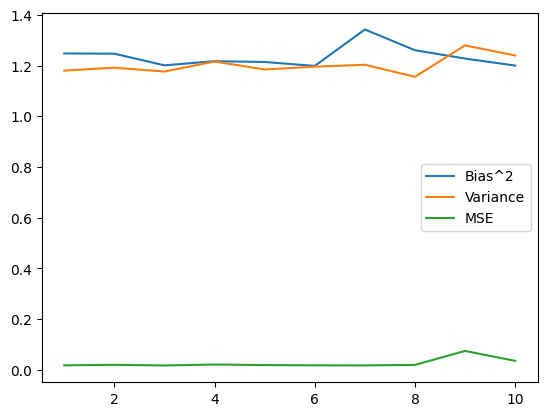

In [16]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the data
tr_datasets = np.load('train_dataset.pickle', allow_pickle=True)
test_dataset = np.load('test_dataset.pickle', allow_pickle=True)

# Combine train and test data to create one dataset
data = np.vstack((tr_datasets, test_dataset))

# Define the degrees of the polynomials
degrees = range(1, 11)

# Divide the train data into 20 equal parts randomly
n_splits = 20
train_sets = []
for i in range(n_splits):
    x_train, _, y_train, _ = train_test_split(tr_datasets[:, :-1], tr_datasets[:, -1], test_size=0.95)
    train_set = np.hstack((x_train, y_train.reshape(-1, 1)))
    train_sets.append(train_set)

#Create 20 datasets (train and test) for each train set and each degree of polynomial
datasets = []
for i in range(n_splits):
    for deg in degrees:
        poly = PolynomialFeatures(degree=deg)
        x_train_poly = poly.fit_transform(train_sets[i][:, :-1])
        x_test_poly = poly.fit_transform(test_dataset[:, :-1])
        dataset = {'train': (x_train_poly, train_sets[i][:, -1]), 'test': (x_test_poly, test_dataset[:, -1])}
        datasets.append(dataset)

# Train a linear classifier on each of the 20 train sets for each degree of polynomial
models = []
for dataset in datasets:
    model = LinearRegression()
    model.fit(dataset['train'][0], dataset['train'][1])
    models.append(model)

# Calculate the bias and variance for each model
results = []
for deg in degrees:
    deg_results = []
    for i in range(n_splits):
        start_idx = (deg - 1) * n_splits + i
        tr_datasets = datasets[start_idx]['train'][0]
        train_labels = datasets[start_idx]['train'][1]
        test_dataset = datasets[start_idx]['test'][0]
        test_labels = datasets[start_idx]['test'][1]

        model = models[start_idx]
        train_predictions = model.predict(tr_datasets)
        test_predictions = model.predict(test_dataset)

        # Calculate bias
        bias = np.mean((test_labels - np.mean(train_predictions))**2)
        bias_sq = bias**2

        # Calculate variance
        variance = np.mean(np.var(test_predictions, axis=0))

        # Calculate mean squared error
        mse = mean_squared_error(test_labels, test_predictions)

        deg_results.append((bias, variance, mse))

    results.append(deg_results)

# Plot the results
bias_sq = [np.mean([x[0] for x in res]) for res in results]
variance = [np.mean([x[1] for x in res]) for res in results]
mse = [np.mean([x[2] for x in res]) for res in results]

plt.plot(degrees, bias_sq, label='Bias^2')
plt.plot(degrees, variance, label='Variance')
plt.plot(degrees, mse, label='MSE')
plt.legend()
plt.show()
